<a href="https://colab.research.google.com/github/Ritesh20patil/justfirst/blob/main/Cartoonify.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Cartoonify

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
def read_file(filename):
  img = cv2.imread(filename)
  img = cv2.cvtColor(img , cv2.COLOR_BGR2RGB)
  plt.imshow(img)
  plt.show()
  return img

##Load image

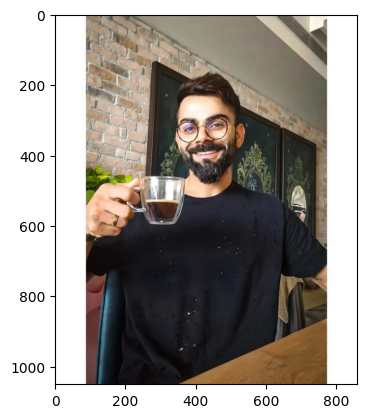

In [ ]:
filename = "vk2.webp"
img =read_file(filename)

org_img = np.copy(img)

##Create Edge Mask

In [ ]:
def edge_mask(img , line_size ,blur_value ):
  gray =cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
  gray_blur = cv2.medianBlur(gray,blur_value)

  edges =cv2.adaptiveThreshold(gray_blur, 255 ,cv2.ADAPTIVE_THRESH_MEAN_C,
                               cv2.THRESH_BINARY ,line_size,blur_value)

  return edges

<function matplotlib.pyplot.show(close=None, block=None)>

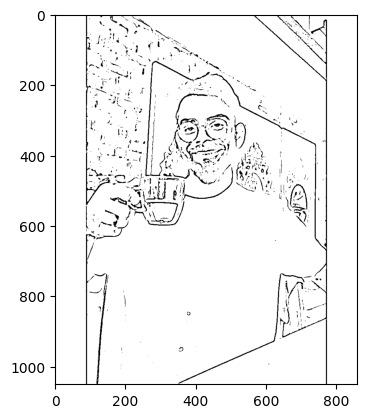

In [ ]:
line_size ,blur_value =7,7
edges = edge_mask(img , line_size ,blur_value )

plt.imshow(edges, cmap= "gray")  #can use cmap = gray and binary for mostly black and white
plt.show

##Reduce color pallete

In [ ]:
def color_quantization(img, k):
  #transform the image
  data = np.float32(img).reshape((-1,3))

  #Dtermine Criteria
  criteria = (cv2.TERM_CRITERIA_EPS+ cv2.TERM_CRITERIA_MAX_ITER, 20 , 0.001)

  #Implementing K-Means
  #k = number of centorids , labels are none ,
  ret , label , center = cv2.kmeans(data, k ,None ,criteria ,10 ,cv2.KMEANS_RANDOM_CENTERS)

  center =np.uint8(center)

  result= center[label.flatten()]
  result = result.reshape(img.shape)

  return result


<function matplotlib.pyplot.show(close=None, block=None)>

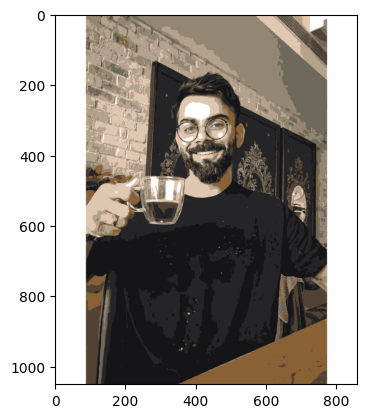

In [ ]:
img = color_quantization(img, k=9)
plt.imshow(img)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

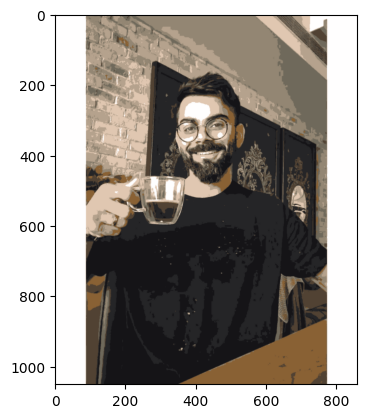

In [ ]:
#Reduce noise

blurred= cv2.bilateralFilter(img , d=3 ,sigmaColor =200 ,sigmaSpace = 200)
plt.imshow(blurred)
plt.show

## combine Edge Mask with Quantize img

In [ ]:
def cartoon():
  c =cv2.bitwise_and(blurred, blurred ,mask= edges)


  plt.imshow(c)
  plt.title("cartoonified img")
  plt.show()

  plt.imshow(org_img)
  plt.title("org_img")
  plt.show()

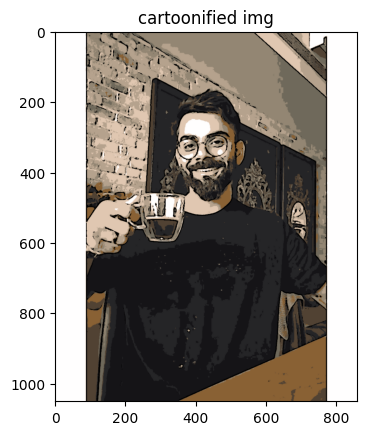

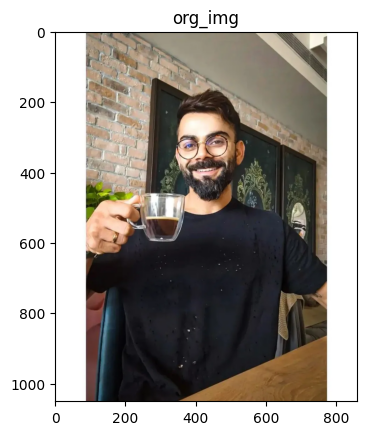

In [ ]:
cartoon()